In [56]:
import torch
import torchvision
from  torchvision import datasets, transforms

train =datasets.MNIST("",train=True,download=True,
                      transform= transforms.Compose([transforms.ToTensor()]))

test =datasets.MNIST("",train=False,download=True,
                      transform= transforms.Compose([transforms.ToTensor()]))

In [57]:
import torch
import torchvision

In [58]:
trainset=torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset=torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)

In [59]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [60]:
x, y=data[0][0], data[1][0]


In [61]:
print(x,y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2078, 0.6627, 0.1725, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
          0.7804, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1255, 0.4392, 0.3882,
          0.0392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [62]:
import matplotlib.pyplot as plt

In [63]:
data[0][0].shape

torch.Size([1, 28, 28])

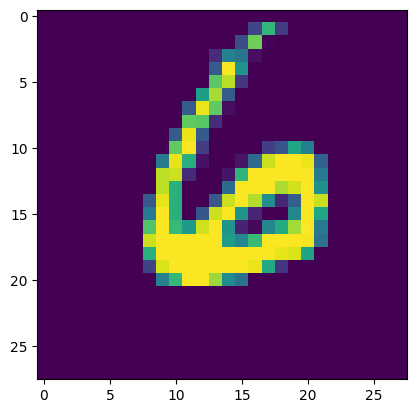

In [64]:
plt.imshow(data[0][0].view(28,28))

In [65]:
total =0
count_dict={ 0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
    Xs,ys=data
    for y in ys:
        count_dict[int(y)]+=1
        total+=1

In [66]:
print(count_dict)
print(total)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
60000


In [67]:
import torch.nn as nn
import torch.nn.functional as F


In [68]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28 , 64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64,10)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)

        return F.log_softmax(x, dim=1)


net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
x = torch.rand((28,28))
x=x.view((-1,28*28))

In [88]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001)
Epochs = 3
for epoch in range(Epochs):
    for data in trainset:
        # data is a batch of features (X) and labels (y)
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))

        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

    print(loss)


tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0282, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)


In [89]:
correct=0
total=0
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx , i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print(correct/total)


0.9736


In [86]:
sample=net(data)

tensor(6)

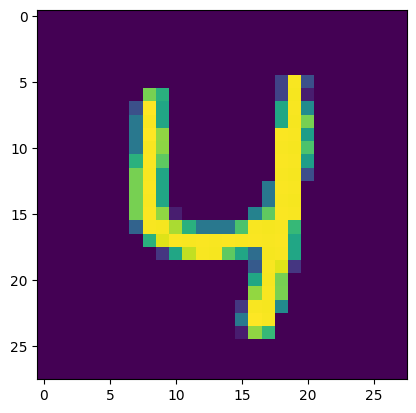

In [92]:
plt.imshow(data[0][5].view(28,28))

In [103]:
sample_out=net(data[0][5].view(-1,28*28))
print(torch.argmax(sample_out))

tensor(4)


In [98]:
data[1][5]

tensor(4)